# **Pneumonia identification from X-Ray images**


---

### **Authors: Sandra Alonso Paz and Lobna Ramadane Morchadi**

> Nowadays, one of the applications of ML models are clinical-decision support algorithms for medical imaging diagnosis. Even it is highly challenging to obtain algorithms with an important reliability and interpretability, the aim of this project is to build a diagnostic tool based in a deep-learning using pySpark, AnaliticsZoo and a Pytorch framework.

> We will apply this approach to a dataset containing chest X-ray images for the diagnosis of pediatric pneumonia. This tool may aid in the diagnosis facilitating early treatment, resulting in improved clinical outcomes and help for clinical interpretability and support to the human expertise.

> To create a based AI solution for our problem we will develop convolutional neural network layers for the classification of images and detection of objects, in this case, anomalies in the pictures. Image analysis filters or convolutions are applied by these multiple processing layers. Within each layer is constructed the abstracted representation of images by systematically convolving many filters across the image, this produces a feature map which is used as input by the following layer. This architecture enables the image processing like pixels as input and to give the wanted classification as output.

> As appears from o the World Health Organization (WHO), pneumonia kills about 2 million children under 5 years old every year and is estimated as one of the leading cause of childhood mortality. Being developing countries, especially in Southeast Asia and Africa, where most of the cases are reported.

> Bacterial and viral pathogens are the two main causes of pneumonia, but each one requires a very different treatment. Bacterial pneumonia requires urgent antibiotic treatments, while viral pneumonia is treated with supportive care. This is why, accurate and in time # Pneumonia identification from X-Ray images
diagnosis is essential. A key element for diagnosis is radiographic data: chest X-rays. These are routinely obtained and can help to differentiate between viral and bacterial pneumonia. But, a fast radiologic interpretation is not always possible, especially in low-resource settings. For that purpose, we are developing an effective supervised machine learning framework to classify pediatric chest X-rays to detect pneumonia and facilitate rapid diagnosis and treatment.

> In our dataset there are a total of 5232 chest X-ray images from children, which 3883 are characterized as depicting pneumonia and 1349 as normal.












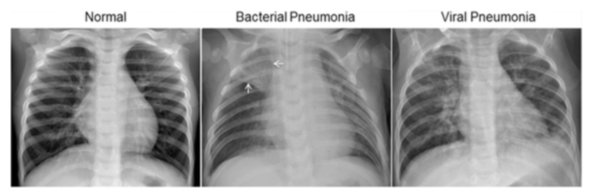

# Step 0: Prepare Environment

Requirements for the execution:

* Install jdk8
* Install latest pre-release version of Analytics Zoo with RayOnSpark

In [1]:
# Install jdk8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
# Set environment variable JAVA_HOME.
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
openjdk version "1.8.0_312"
OpenJDK Runtime Environment (build 1.8.0_312-8u312-b07-0ubuntu1~18.04-b07)
OpenJDK 64-Bit Server VM (build 25.312-b07, mixed mode)


In [2]:
# Install latest pre-release version of Analytics Zoo with RayOnSpark
# Installing Analytics Zoo from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade analytics-zoo[ray]

     |████████████████████████████████| 194.7 MB 65 kB/s 
     |████████████████████████████████| 114.0 MB 29 kB/s 
     |████████████████████████████████| 218.4 MB 63 kB/s 
     |████████████████████████████████| 47.5 MB 109 kB/s 
     |████████████████████████████████| 62 kB 940 kB/s 
     |████████████████████████████████| 1.3 MB 53.2 MB/s 
     |████████████████████████████████| 65 kB 3.8 MB/s 
     |████████████████████████████████| 94 kB 4.2 MB/s 
     |████████████████████████████████| 271 kB 74.3 MB/s 
     |████████████████████████████████| 197 kB 69.9 MB/s 
     |████████████████████████████████| 173 kB 66.3 MB/s 
     |████████████████████████████████| 3.0 MB 59.4 MB/s 
     |████████████████████████████████| 128 kB 66.1 MB/s 
     |████████████████████████████████| 82 kB 308 kB/s 
     |████████████████████████████████| 202 kB 65.5 MB/s 
     |████████████████████████████████| 58 kB 6.5 MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.6-py2.py3-none-any.whl size=2188

# Step 1: Init Orca Context

Most AI projects start with a Python notebook running on a single laptop; however, one usually needs to go through a mountain of pains to scale it to handle larger data set in a distributed fashion. The Orca library seamlessly scales out your single node TensorFlow or PyTorch notebook across large clusters (so as to process distributed Big Data).

Ray is an open source distributed framework for emerging AI applications. It allows users to directly run Ray programs on existing Big Data clusters, and directly write Ray code inline with their Spark code (so as to process the in-memory Spark RDDs or DataFrames).

## First, we should import necesary libraries and modules


In [3]:
from zoo.orca import init_orca_context, stop_orca_context
from zoo.orca import OrcaContext

## Then, let's initialize Orca context

In [4]:
# It is recommended to set it to True when running Analytics Zoo in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

init_orca_context(cluster_mode="local", cores=6)

Initializing orca context
Current pyspark location is : /usr/local/lib/python3.7/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.7/dist-packages/zoo/share/lib/analytics-zoo-bigdl_0.13.1-SNAPSHOT-spark_2.4.6-0.12.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/lib/bigdl-0.13.1-SNAPSHOT-jar-with-dependencies.jar pyspark-shell 
2022-02-10 21:46:47 WARN  NativeCodeLoader:62 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


cls.getname: com.intel.analytics.bigdl.python.api.Sample
BigDLBasePickler registering: bigdl.util.common  Sample
cls.getname: com.intel.analytics.bigdl.python.api.EvaluatedResult
BigDLBasePickler registering: bigdl.util.common  EvaluatedResult
cls.getname: com.intel.analytics.bigdl.python.api.JTensor
BigDLBasePickler registering: bigdl.util.common  JTensor
cls.getname: com.intel.analytics.bigdl.python.api.JActivity
BigDLBasePickler registering: bigdl.util.common  JActivity
Successfully got a SparkContext



User settings:

   KMP_AFFINITY=granularity=fine,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   OMP_NUM_THREADS=1

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_MWAIT_HINTS=0
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_

<SparkContext master=local[6] appName=pyspark-shell>

## Now it is time to perform data-parallel processing in Orca.

In [5]:
# This supports standard Spark Dataframes, TensorFlow Dataset, PyTorch DataLoader, Pandas, Pillow, etc.
spark = OrcaContext.get_spark_session()

# Step 2: Define the Model



After consulting several resources we came up with the conclusion that Transfer learning was the best choice for solving the proposed problem.

## 2.1. What is Trasnfer Learning?
**Transfer learning** is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.
It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems. [1]

## 2.2. What is ResNet?

ResNet stands for Residual Network. It is an innovative neural network that was first introduced by Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun in their 2015 computer vision research paper titled ‘Deep Residual Learning for Image Recognition’ [2].

## 2.3. What Is ResNet-50?

ResNet has many variants that run on the same concept but have different numbers of layers. Resnet50 is used to denote the variant that can work with 50 neural network layers. [3]

## 2.4. Deep Neural Networks in Computer Vision

When working with deep convolutional neural networks to solve a problem related to computer vision, machine learning experts engage in stacking more layers. These additional layers help solve complex problems more efficiently as the different layers could be trained for varying tasks to get highly accurate results.

While the number of stacked layers can enrich the features of the model, a deeper network can show the issue of degradation. In other words, **as the number of layers of the neural network increases, the accuracy levels may get saturated and slowly degrade after a point**. As a result, the performance of the model deteriorates both on the training and testing data.

This degradation is not a result of overfitting. Instead, it may result from the initialization of the network, optimization function, or, more importantly, the problem of vanishing or exploding gradients.

**ResNet was created with the aim of tackling this exact problem**. Deep residual nets make use of residual blocks to improve the accuracy of the models. The concept of “skip connections,” which lies at the core of the residual blocks, is the strength of this type of neural network.

## 2.5. Resnet50 with Keras

Keras is a deep learning API that is popular due to the simplicity of building models using it. Keras comes with several pre-trained models, including Resnet50, that anyone can use for their experiments.

Therefore, building a residual network in Keras for computer vision tasks like image classification is relatively simple.

In [6]:
import tensorflow as tf
import keras as K
from tensorflow.keras.optimizers import Adam

# References used while creating the model:
  # Create a model based on Zoo Keras: 
  #        https://github.com/intel-analytics/analytics-zoo/blob/master/docs/docs/ProgrammingGuide/workingwithimages.md

  # Net type and parameters:
  #       https://keras.io/api/applications/resnet/#resnet50-function
  #       https://www.delltechnologies.com/asset/en-us/solutions/industry-solutions/industry-market/h17686_hornet_wp.pdf

  # Transfer learning:
  #        https://medium.com/@kenneth.ca95/a-guide-to-transfer-learning-with-keras-using-resnet50-a81a4a28084b
  #        https://chroniclesofai.com/transfer-learning-with-keras-resnet-50/

def model_creator(config):
  # Pre-trained model
   res_model = tf.keras.applications.ResNet50(include_top=False, weights="imagenet", input_tensor=None,
                                               input_shape=(224, 224, 3), pooling=None)
   # Create and model based on pretrained model
   model = K.models.Sequential()
   model.add(res_model)
   # Flatten reshapes the tensor to have a shape that is equal to the number of elements contained in the tensor (making a 1d-array of elements)
   model.add(K.layers.Flatten())
   # Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation has been setted at sigmoid
   model.add(K.layers.Dense(1, activation='sigmoid'))
   # Compile the model means configure the model. For this task we have selected categorical_crossentropy as loss and the adam optimizer (see below).
   # As we want to study our result we will need to obtain the accuracy, precission and recall which are the most important parameter in this terms
   model.compile( loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
                  metrics=['accuracy', 
                  K.metrics.Precision(name='precision'), 
                  K.metrics.Recall(name='recall')])
   # Model has been created
   return model

## What is the Adam optimization algorithm?
Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

When introducing the algorithm, the authors list the attractive benefits of using Adam on non-convex optimization problems, as follows:

* Straightforward to implement.
* Computationally efficient.
* Little memory requirements.
* Invariant to diagonal rescale of the gradients.
* Well suited for problems that are large in terms of data and/or parameters.

In this sense we made use of Adam optimzer instead of RMSprop proposed on the followed guide [4]

# Step 3: Define Train Dataset

Our dataset has been upload to our personal Drive for facilitating data handling account but can also be downloaded in [Kaggle](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia).

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# In order to develop a user-friendly code, we have save the different paths we will use 
# during the devlopment process.
train_images= '/content/drive/MyDrive/UPM/chest_xray/test'
val_images = '/content/drive/MyDrive/UPM/chest_xray/val/'
test_images = '/content/drive/MyDrive/UPM/chest_xray/test/'

## 3.1. Preprocessing

> Image pre-processing are all the steps that involve to format images before they are used by the model training. This usually includes: resizing, orienting and color corrections.

> As we are using fully connected layers in convolutional neural networks, these require that all images are the same sized arrays. Most architectures require a squared image entry, but in very few situations we have images with that format. In this sense we have used resize() function for resizing all images in 1024x1024. Moreover we have used CenterCrop() function for focussing on the center of the chest x ray image where ususally are placed the anomalies we want to find.

> On the other hand, color changes are a type of image transformation that is generally applied to all the dataset (train and test). Being more timely performance when images are grayscaled. Color images are stored as red, green and blue values, while grayscale images are only stored as a range of white to black. This means only need to work with one matrix per image, and not three as in color images occurs. [5]

> Finally, we have included the function ColorJitter which adjuste bringhtness and contrast.


In [ ]:
import torchvision
import torchvision.transforms as T

# Firstly we have defined a function (which will be called later) to include all the preprocessing function we want to apply.
# In our case:
# 1. CenterCrop() to focuss on the center of the image
# 2. RandomHorizontalFlip() to randomly flip the image (0.5 = 50%)
# 3. ColorJitter() which manages the brightness and contrast of the image
def define_transformer(sample):
  transformer = torchvision.transforms.Compose([T.CenterCrop(224), T.RandomHorizontalFlip(p=0.5), T.ColorJitter(brightness=0.2, contrast=0.2,hue=0)])
  return transformer(sample)

In [ ]:
# Here we resize y call define_transformer function for each all the paths and its images
import os
from PIL import Image

def processing (path):
  path_types = ['NORMAL/', 'PNEUMONIA/']
  for t in path_types:
    for img in os.listdir(path+t): # For all the images contained in the folders
        image = Image.open(path+t+img) # We use PIL functions to manage the images
        new_image = image.resize((1024, 1024)) # Resize to a proper and common size
        define_transformer(new_image).save(path+'processed/'+t+img) # Save the result in a new folder for using them in training and testing

In [ ]:
# Perform the pre-processing process for all the paths
paths = [train_images, val_images, test_images]
for p in paths:
    processing(p)

In [9]:
# New paths for processed images
train_images= '/content/drive/MyDrive/UPM/chest_xray/train/processed'
val_images = '/content/drive/MyDrive/UPM/chest_xray/val/processed'
test_images = '/content/drive/MyDrive/UPM/chest_xray/test/processed'

## 3.2. Create Dataset for future training and testing

In [14]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow import keras as K

# Function extracted from 
#       https://analytics-zoo.readthedocs.io/en/latest/doc/Orca/QuickStart/orca-tf2keras-quickstart.html and
#       https://keras.io/api/preprocessing/image/

from tensorflow.keras.preprocessing import image_dataset_from_directory

def train_data_creator(config, batch_size):
    train_ds = image_dataset_from_directory(train_images, 
                                            labels="inferred",                      # labels are generated from the directory structure
                                            label_mode="binary",                    #  means that the labels can be only 2
                                            # !! important !! in other versions you could chose float32  as label mode. However is not usable any more
                                            # But it is mandatory to convert later this type
                                            class_names = ['NORMAL', 'PNEUMONIA'],
                                            image_size=(224, 224),                  # Shape has been defined before as 224x224 after cropping images so we set this param to not resize again
                                            batch_size = 1,                         # Size of the batches of data.
                                            shuffle=False,
                                            color_mode='grayscale')                 # Better result are shown when grayscale is applied
    # Duplication of the train dataset
    train_ds = train_ds.repeat(2)

    # train_ds = train_ds.shuffle(1000)
    # train_ds = train_ds.batch(batch_size)

    # map function is frequently used for applying a characteristic or method to set of data. In our case we need to perform three:
    # 1. data_augmentation is a technique for increasing the diversity of your training set by applying random (but realistic) transformations, such as image rotation.
    train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training = True), y))
    # 2. Perform the preproces proper to Resnet50 
    train_ds = train_ds.map(lambda x, y: (K.applications.resnet50.preprocess_input(x), y))
    # 3. Finally, it is mandatory to cast (change type) to float32 (as explained above (label_mode = binary)) in order to avoid converse problems
    train_ds = train_ds.map(lambda x, y: (tf.cast(x, dtype = tf.float32), y))
    return train_ds


def val_data_creator(config, batch_size):
    val_ds = image_dataset_from_directory(val_images, 
                                            labels="inferred",
                                            label_mode="binary",
                                            class_names = ['NORMAL', 'PNEUMONIA'],
                                            image_size=(224, 224), 
                                            batch_size = 1,
                                            shuffle=False,
                                            color_mode='grayscale')
    val_ds = val_ds.repeat(2)
    # val_ds = val_ds.shuffle(1000)
    # val_ds = val_ds.batch(batch_size)

    val_ds = val_ds.map(lambda x, y: (K.applications.resnet50.preprocess_input(x), y))
    val_ds = val_ds.map(lambda x, y: (tf.cast(x, dtype = tf.float32), y))
    return val_ds

def test_data_creator(config, batch_size):
    test_ds = image_dataset_from_directory(test_images, 
                                            labels="inferred",
                                            label_mode="binary",
                                            class_names = ['NORMAL', 'PNEUMONIA'],
                                            image_size=(224, 224), 
                                            batch_size = 1,
                                            shuffle=True,
                                            color_mode='grayscale')
    # test_ds = test_ds.shuffle(1000)
    # test_ds = test_ds.batch(batch_size)
    test_ds = test_ds.repeat(2)
    test_ds = test_ds.map(lambda x, y: (K.applications.resnet50.preprocess_input(x), y))
    test_ds = test_ds.map(lambda x, y: (tf.cast(x, dtype = tf.float32), y))
    return test_ds


# Step 4: Fit with Orca Estimator

## 4.1. Create an Estimator

In [11]:
from zoo.orca.learn.tf2.estimator import Estimator

est = Estimator.from_keras(model_creator = model_creator)

2022-02-10 21:47:20,178	INFO services.py:1174 -- View the Ray dashboard at http://172.28.0.2:8265


{'node_ip_address': '172.28.0.2', 'raylet_ip_address': '172.28.0.2', 'redis_address': '172.28.0.2:6379', 'object_store_address': '/tmp/ray/session_2022-02-10_21-47-19_488411_69/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-02-10_21-47-19_488411_69/sockets/raylet', 'webui_url': '172.28.0.2:8265', 'session_dir': '/tmp/ray/session_2022-02-10_21-47-19_488411_69', 'metrics_export_port': 64738, 'node_id': '7e395c00bf399531f5faed3ba45ca6ba623222434de7330236a9bc24'}


(pid=624) WARNING:tensorflow:From /usr/local/lib/python3.7/dist-packages/zoo/orca/learn/tf2/tf_runner.py:317: _CollectiveAllReduceStrategyExperimental.__init__ (from tensorflow.python.distribute.collective_all_reduce_strategy) is deprecated and will be removed in a future version.
(pid=624) Instructions for updating:
(pid=624) use distribute.MultiWorkerMirroredStrategy instead
(pid=624) 2022-02-10 21:47:26.796938: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


(pid=624) Downloading data from https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
10993664/94765736 [==>...........................]
(pid=624)  - ETA: 2s
94781440/94765736 [==============================] - 2s 0us/step


## 4.2. Evaluate the model using Estimator

In [23]:
batch_size = 10
stats = est.fit(train_data_creator,
                epochs=1,
                batch_size=batch_size,
                validation_data= val_data_creator)

(pid=624) Found 5216 files belonging to 2 classes.


(pid=624) WARNING:tensorflow:AutoGraph could not transform <function train_data_creator.<locals>.<lambda> at 0x7f5caa0d37a0> and will run it as-is.
(pid=624) Cause: could not parse the source code of <function train_data_creator.<locals>.<lambda> at 0x7f5caa0d37a0>: no matching AST found among candidates:
(pid=624) 
(pid=624) To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(pid=624) WARNING:tensorflow:AutoGraph could not transform <function train_data_creator.<locals>.<lambda> at 0x7f5caa1203b0> and will run it as-is.
(pid=624) Cause: could not parse the source code of <function train_data_creator.<locals>.<lambda> at 0x7f5caa1203b0>: no matching AST found among candidates:
(pid=624) 
(pid=624) To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(pid=624) WARNING:tensorflow:AutoGraph could not transform <function train_data_creator.<locals>.<lambda> at 0x7f5caa0d3dd0> and will run it as-is.
(pid=624

(pid=624) Found 16 files belonging to 2 classes.


(pid=624) WARNING:tensorflow:AutoGraph could not transform <function val_data_creator.<locals>.<lambda> at 0x7f5cac926c20> and will run it as-is.
(pid=624) Cause: could not parse the source code of <function val_data_creator.<locals>.<lambda> at 0x7f5cac926c20>: no matching AST found among candidates:
(pid=624) 
(pid=624) To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(pid=624) WARNING:tensorflow:AutoGraph could not transform <function val_data_creator.<locals>.<lambda> at 0x7f5cac926e60> and will run it as-is.
(pid=624) Cause: could not parse the source code of <function val_data_creator.<locals>.<lambda> at 0x7f5cac926e60>: no matching AST found among candidates:
(pid=624) 
(pid=624) To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(pid=624) 2022-02-10 21:55:42.989396: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it faile

Se han truncado las últimas 5000 líneas del flujo de salida.
 5479/10432 [==============>...............] - ETA: 1:28:18 - loss: 0.0000e+00 - accuracy: 0.2928 - precision: 0.0000e+00 - recall: 0.0000e+00
(pid=624) 
 5498/10432 [==============>...............]
(pid=624)  - ETA: 1:27:55 - loss: 0.0000e+00 - accuracy: 0.2952 - precision: 0.0000e+00 - recall: 0.0000e+00
 5772/10432 [===============>..............]
(pid=624)  - ETA: 1:22:28 - loss: 0.0000e+00 - accuracy: 0.3287 - precision: 0.0000e+00 - recall: 0.0000e+00
 5864/10432 [===============>..............] - ETA: 1:20:40 - loss: 0.0000e+00 - accuracy: 0.3392 - precision: 0.0000e+00 - recall: 0.0000e+00
(pid=624) 
(pid=624) 
(pid=624)  5865/10432 [=====

(pid=624) 2022-02-11 00:49:07.555060: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_1"
(pid=624) op: "TensorSliceDataset"
(pid=624) input: "Placeholder/_0"
(pid=624) attr {
(pid=624)   key: "Toutput_types"
(pid=624)   value {
(pid=624)     list {
(pid=624)       type: DT_STRING
(pid=624)     }
(pid=624)   }
(pid=624) }
(pid=624) attr {
(pid=624)   key: "_cardinality"
(pid=624)   value {
(pid=624)     i: 16
(pid=624)   }
(pid=624) }
(pid=624) attr {
(pid=624)   key: "is_files"
(pid=624)   value {
(pid=624)     b: false
(pid=624)   }
(pid=624) }
(pid=624) attr {
(pid=624)   key: "metadata"
(pid=624)   value {
(pid=624)     s: "\n\025TensorSliceDataset:46"
(pid=624)   }
(pid=624) }
(pid=624) attr {
(pid=624)   key: "output_shapes"
(pid=624)   value {
(pid=624)     list {
(pid=624)   

10432/10432 [==============================] - 10416s 997ms/step - loss: 0.0000e+00 - accuracy: 0.2571 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


# Step 5: Evaluate the model

In [25]:
stats = est.evaluate(test_data_creator, num_steps=1000)


   5/1000 [..............................]
(pid=624)  - ETA: 1:19:47 - loss: 0.0000e+00 - accuracy: 0.3812 - precision: 0.0000e+00 - recall: 0.0000e+00
  20/1000 [..............................] - ETA: 1:16:15 - loss: 0.0000e+00 - accuracy: 0.3750 - precision: 0.0000e+00 - recall: 0.0000e+00


(pid=624) WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 1000 batches). You may need to use the repeat() function when building your dataset.


1000/1000 [==============================] - 121s 89ms/step - loss: 0.0000e+00 - accuracy: 0.3750 - precision: 0.0000e+00 - recall: 0.0000e+00
(pid=624) Found 624 files belonging to 2 classes.


(pid=624) WARNING:tensorflow:AutoGraph could not transform <function test_data_creator.<locals>.<lambda> at 0x7f5cac885a70> and will run it as-is.
(pid=624) Cause: could not parse the source code of <function test_data_creator.<locals>.<lambda> at 0x7f5cac885a70>: no matching AST found among candidates:
(pid=624) 
(pid=624) To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(pid=624) WARNING:tensorflow:AutoGraph could not transform <function test_data_creator.<locals>.<lambda> at 0x7f5cac885830> and will run it as-is.
(pid=624) Cause: could not parse the source code of <function test_data_creator.<locals>.<lambda> at 0x7f5cac885830>: no matching AST found among candidates:
(pid=624) 
(pid=624) To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(pid=624) 2022-02-11 00:53:51.276229: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it f

  19/1000 [..............................] - ETA: 1:16:34 - loss: 0.0000e+00 - accuracy: 0.3734 - precision: 0.0000e+00 - recall: 0.0000e+00


(pid=624) WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 1000 batches). You may need to use the repeat() function when building your dataset.


1000/1000 [==============================] - 93s 87ms/step - loss: 0.0000e+00 - accuracy: 0.3750 - precision: 0.0000e+00 - recall: 0.0000e+00


In [26]:
est.save("chest_x_ray.model")
print(stats)

{'validation_loss': 0.0, 'validation_accuracy': 0.375, 'validation_precision': 0.0, 'validation_recall': 0.0}


In [ ]:
est.shutdown()


# Global references:

[1] https://machinelearningmastery.com/transfer-learning-for-deep-learning/

[2] https://arxiv.org/abs/1512.03385

[3] https://viso.ai/deep-learning/resnet-residual-neural-network/

[4] https://analytics-zoo.readthedocs.io/en/latest/doc/Orca/QuickStart/orca-tf2keras-quickstart.html

[5] https://blog.roboflow.com/why-preprocess-augment/#:~:text=Preprocessing%20is%20required%20to%20clean%20image%20data%20for%20model%20input.&text=Adjusting%20existing%20training%20data%20to,collected%20datasets%20may%20be%20small.